In [4]:
# MIT License
# Copyright (c) 2021 
# Earthquake Engineering and Structural Dynamics (EESD), EPFL 

import sys  
sys.path.insert(0, '../src')

import numpy as np
import matplotlib.pyplot as plt
import os
from data_loader import get_loader
from networks import *
import torch
from evaluation import *
import csv
from tqdm import tqdm

In [16]:
# input from the user
index_model = 0
architecture = 'TernausNet16'
image_size = 256
test_data_with_ground_truth = True  # if there is not any ground-truth for the test data,
# this variable must set to False.
images_group = 'test'


In [21]:
dirrectory_names = os.getcwd().split(os.path.sep)
root = ''
for ind in range(len(dirrectory_names) - 1):
    root += dirrectory_names[ind] + '/'
# model path
model_path = root + 'models/' 
model_names = []
for file in os.listdir(model_path):
    if file.endswith(".pkl"):
        model_names.append(file)
    
model_path_list = []
for model_ind in range(len(model_names)):
    model_path_list .append(model_path + model_names[model_ind])

# images path
images_path = root + 'dataset/DIC_crack_dataset/' + images_group + '/'
imageNames = []
for imageFile in os.listdir(images_path):
    if imageFile[-4:] in ['.JPG', '.tif', '.png']:
        imageNames.append(imageFile[:-4])

# predictions path
predictions_path = root + 'predictions/' + images_group + '/'

test_loader = get_loader(image_path=images_path,
                         image_size=image_size,
                         batch_size=1,
                         num_workers=0,
                         mode='valid',
                         augmentation_prob=0.,
                         shuffle_flag=False)

image count in valid path :100


In [22]:
model = TernausNet16()
model.load_state_dict(torch.load(model_path_list[index_model]))
model.train(False)
model.eval()

TernausNet16(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17)

0it [00:00, ?it/s]

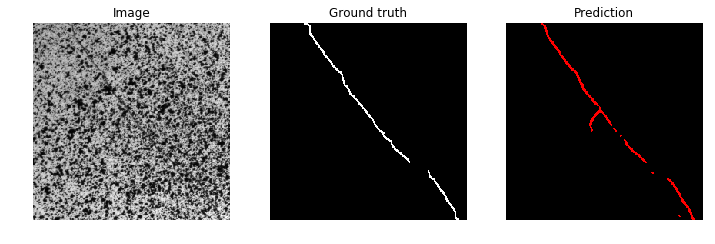

1it [00:03,  3.49s/it]

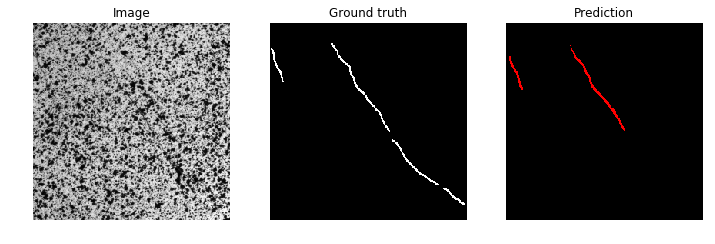

2it [00:06,  3.36s/it]

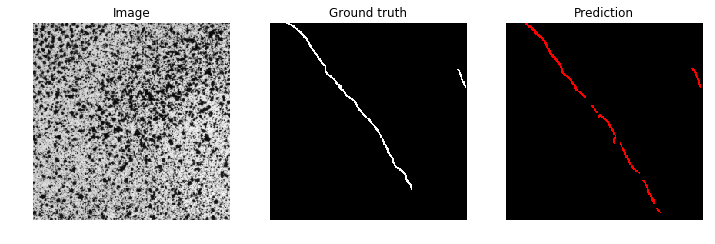

3it [00:09,  3.27s/it]

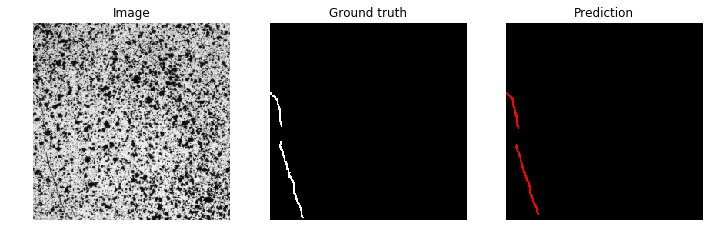

4it [00:13,  3.25s/it]

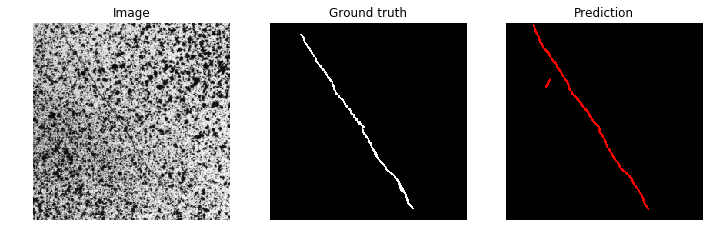

5it [00:18,  3.61s/it]


KeyboardInterrupt: 

In [24]:

with torch.no_grad():
    # save side by side results
    for idx, (image, GT) in enumerate(test_loader):
        SR = model(image)
        SR_probs = torch.sigmoid(SR)

        SR_probs = SR_probs.view(1,1,256,256)
        SR_probs_arr = SR_probs.detach().numpy().reshape(image_size, image_size)
        GT_arr = GT.detach().numpy().reshape(image_size, image_size)
        binary_result = SR_probs_arr > 0.5
        image_numpy = image.detach().numpy()
        image_numpy = image_numpy[0, 0, :, :]

        fig, ax = plt.subplots(figsize=(12, 16), nrows=1, ncols=3)
        ax[0].imshow(image_numpy, cmap=plt.cm.gray)
        ax[0].set_title('Image')
        ax[0].axis('off')
        ax[1].imshow(GT_arr, cmap=plt.cm.binary_r)
        ax[1].set_title('Ground truth')
        ax[1].axis('off')
        ax[2].imshow(binary_result, cmap=plt.cm.flag_r)
        ax[2].set_title('Prediction')
        ax[2].axis('off')
        plt.show()
    